Felipe Bartelt de Assis Pessoa - 2016026841

#  Multilayer Perceptron (MLP)
Para observar o comportamento de uma MLP, treinou-se uma rede com uma única camada escondida, com $3$ neurônios na camada intermediária, cuja função de ativação é $\tanh(\cdot)$. A função de ativação da saída é a função identidade.

In [1]:
import numpy as np
import plotly.express as px

Primeiramente, gerou-se dados sintéticos $y = \sin(x) + noise$, onde $x$ é um vetor de tamanho $45$, cujos valores são amostrados uniformemente entre o intervalo $[0, 2\pi)$ e $noise$ é um vetor de ruído, de tamanho $45$, com valores aleatórios distribuídos uniformemente no intervalo $[-0.1, 0.1)$. Esses dados serão utilizados para o treinamento da rede.

Os dados gerados são mostrados a seguir:

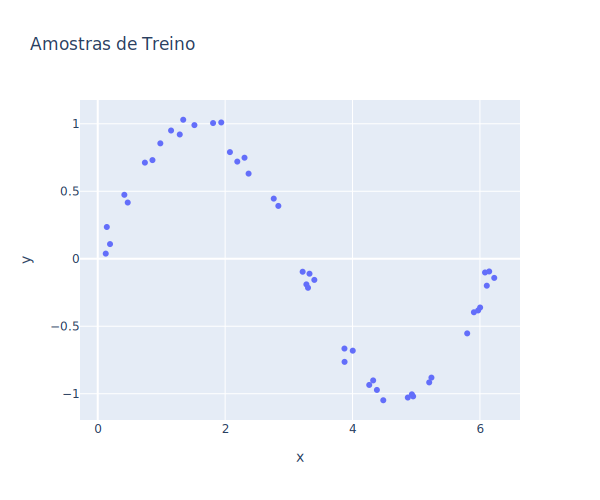

In [2]:
N_train = 45
rng = np.random.default_rng()
noise = rng.uniform(-0.1, 0.1, N_train)
x_train = rng.uniform(0,2*np.pi, N_train)
y_train = np.sin(x_train)+noise
fig = px.scatter(x=x_train,y=y_train, width = 600, height = 500, title='Amostras de Treino')
fig.show(renderer = 'svg', width = 600, height = 500)

Após, gerou-se dados de teste, tomando valores no intervalo $[0,2\pi)$ com passo $0.01$. Os dados obtidos são mostrados abaixo:

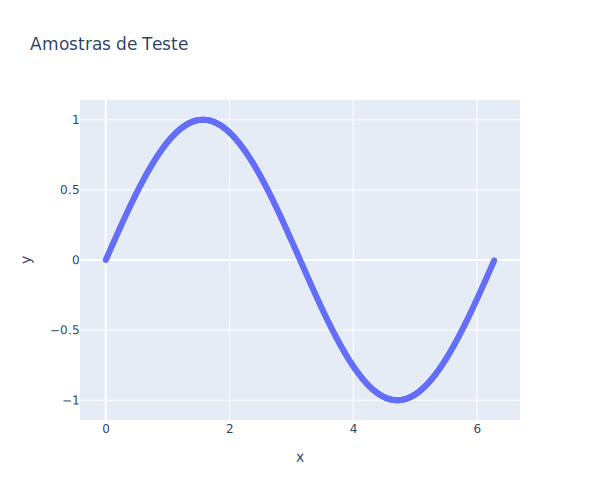

In [3]:
step = 0.01
x_test = np.arange(0,2*np.pi, step)
y_test = np.sin(x_test)
fig = px.scatter(x=x_test, y=y_test, width=600, height=500, title='Amostras de Teste')
fig.show(renderer = 'svg', width = 600, height = 500)

Em seguida, definiu-se a função para treinamento do MLP `train_MLP`, cujos parâmetros são: as amostras de entrada `x`; as amostras de saída `y`; o número de neurônios na camada intermediária `hidden_size`; o passo do gradiente descendente `step`, que é opcional com default $=0.01$; a tolerância de erro `tol`, também opcional, com default = $0.001$; e o número máximo de épocas, opcional, com default $=1000$. A função retorna uma tupla com os pesos da camada intermediária $Z$ e os pesos da camada de saída $w$.

Essa função realiza o *backpropagation* por meio do cálculo dos "erros" de cada camada. O método de gradiente descendente implementado foi o *Stochastic Gradient Descent*, dessa forma, os pesos são atualizados por meio da iteração amostra a amostra. Os valores iniciais dos pesos, tanto da camada de saída quanto intermediária, são dados pela inicialização de Xavier, isso é, com uma distribuição uniforme no intervalor $[-\epsilon,\epsilon]$, onde $\epsilon = \frac{\sqrt{6}}{\sqrt{L_{in}+L_{out}}}$, sendo $L_{in}$ o número de neurônios da camada anterior e $L_{out}$ o número de neurônios da camada posterior.

Criou-se ainda uma função para avaliação da resposta de um MLP `eval_MLP`, de forma a facilitar os testes. A função tem como parâmetros o vetor de testes `x_test` e o parâmetro `theta`, uma tupla que contém os pesos da camada intermediária e camada de saída, necessariamente nessa ordem. A função então adiciona os termos de polarização necessários e calcula a resposta aproximada pelo modelo `yhat`.

In [18]:
def sigmoid(z):
    return np.tanh(z)

def sigmoid_grad(z):
    return (1/np.cosh(z))**2

def train_MLP(x, y, hidden_size, step = 0.01, tol = 1e-3, max_epoch = 1000):
    epoch, err = 0, np.inf
    N, L_in = x.shape
    L_out = y.shape[1]
    epsilon = np.sqrt(6)/np.sqrt(L_in+hidden_size)
    epsilon_w = np.sqrt(6)/np.sqrt(L_out+hidden_size)
    Z = np.random.default_rng().uniform(-epsilon,epsilon,(L_in, hidden_size))
    w = np.random.default_rng().uniform(-epsilon_w,epsilon_w,(hidden_size+1, L_out))
    
    while epoch < max_epoch and err > tol:
        J  = 0 
        for xs, ys in zip(x, y):
            x_sample = xs.copy().reshape(1,-1)
            y_sample = ys.copy().reshape(1,-1)
            u = np.c_[np.ones((x_sample.shape[0], 1)), sigmoid(x_sample @ Z)]
            h = (u @ w)
            delta_w = (y_sample - h)
            delta_z = ((delta_w @ w.T) * sigmoid_grad(u))
            Z = Z + step * (x_sample.T @ (delta_z[:, 1::]))
            w = w + step * (u.T @ delta_w)
            J = J + 1/(2*N)*(h - y_sample).T @ (h - y_sample)

        epoch += 1
        err = J
    return (Z, w)

def eval_MLP(x_test, theta):
    Z, w = theta
    u = sigmoid(x_test @ Z)
    yhat = np.c_[np.ones((u.shape[0], 1)), u] @ w
    return yhat
    


De forma a se testar o funcionamento da MLP, realizou-se o treinamento da rede 5 vezes, utilizando as mesmas amostras de treinamento e teste apresentadas anteriormente. Para cada iteração, calculou-se o erro quadrático médio (MSE), que foram adicionados à uma lista de erros `mse_list`, de forma ser possível, ao final, tomar a média e desvio padrão dos erros obtidos nas $5$ iterações. Para todos os treinamentos, considerou-se um número máximo de épocas `max_epoch = 2000` e passo do gradiente descendente 0.1

Ao final, apresenta-se o gráfico que contém as amostras de treino, a resposta obtida pelo modelo para as amostras de teste e o sinal senoidal esperado, dado por `y_test`.

MSE na 1° iteracao:  0.014286472031518152
MSE na 2° iteracao:  0.13538531634197867
MSE na 3° iteracao:  0.017414798139666118
MSE na 4° iteracao:  0.013968561512552961
MSE na 5° iteracao:  0.014561224091236108
Media dos MSE: 0.039123274423390406 
Desvio Padrao dos MSE: 0.04814677415589939


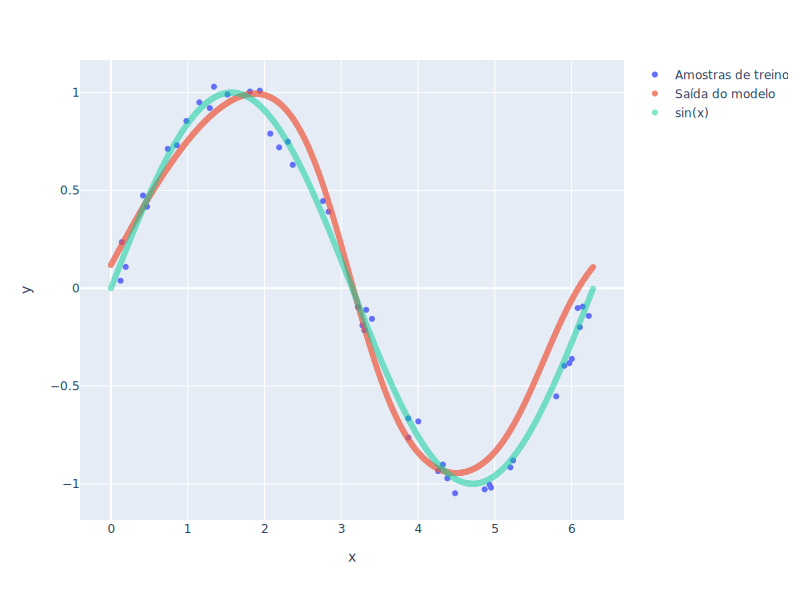

In [19]:
mse_list = []
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_train_ = np.c_[np.ones(x_train.shape), x_train]
x_test_ = np.c_[np.ones((x_test.size, 1)), x_test.reshape(-1,1)]
for i in range(5):
    theta = train_MLP(x_train_, y_train, 3, step=0.1, max_epoch=2000)
    yhat = eval_MLP(x_test_, theta)
    mse = ((yhat - y_test).T @ (yhat - y_test))/y_test.shape[0]
    print('MSE na {}° iteracao: '.format(i+1), float(mse.ravel()))
    mse_list.append(mse)
print('Media dos MSE: {} \nDesvio Padrao dos MSE: {}'.format(np.mean(mse_list), np.std(mse_list)))

sort_idx = np.argsort(x_train.flatten())
fig = px.scatter(x=x_train.flatten()[sort_idx], y=y_train.flatten()[sort_idx], width = 800, height=600)
fig.add_scatter(x=x_test.flatten(), y=yhat.flatten(), mode='markers', opacity = 0.7)
fig.add_scatter(x=x_test.flatten(), y=y_test.flatten(), mode='markers', opacity = 0.5)
fig['data'][0]['showlegend']=True
fig['data'][0]['name']='Amostras de treino'
fig['data'][1]['name']='Saída do modelo'
fig['data'][2]['name']='sin(x)'

fig.show(renderer = 'svg', width=800, heigth=600)